# Load Dataset
* The dataset loaded are VHD11K and LSPD combined. They are stored in google drive.
* LSPD contains nudity and pornography images.
* VHD11K contains harmful images such as violent and harmful objects.

In [1]:
!pip install -y gdown


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [2]:
# ---- LSPD Dataset ----
# Train and Validation annotation
!gdown 1sL-CQ3CQO8CrFZ1nw3tW6zZNM8EIZzpd -O lspd/
!gdown 1VFxJYwBWtNpaIR9SEa3ZbfXqY-gQxDZb -O lspd/

# Train and Validation folders (zip)
!gdown 1FW1zfUrGw-87MiM2dRi2rRPU7xGCtlsJ -O lspd/
!gdown 1g33SdH5rA2udEkXlToVsW2jXIp6PnNBk -O lspd/

# Unzip folders
!unzip /kaggle/working/lspd/train_v4.zip -d lspd/
!unzip /kaggle/working/lspd/val_v4.zip -d lspd/

Downloading...
From (original): https://drive.google.com/uc?id=1sL-CQ3CQO8CrFZ1nw3tW6zZNM8EIZzpd
From (redirected): https://drive.google.com/uc?id=1sL-CQ3CQO8CrFZ1nw3tW6zZNM8EIZzpd&confirm=t&uuid=006b9484-81bf-4bde-be4e-980be62960da
To: /kaggle/working/lspd/train_COCO.json
100%|████████████████████████████████████████| 223M/223M [00:03<00:00, 63.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VFxJYwBWtNpaIR9SEa3ZbfXqY-gQxDZb
To: /kaggle/working/lspd/val_COCO.json
100%|██████████████████████████████████████| 64.4M/64.4M [00:00<00:00, 76.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1FW1zfUrGw-87MiM2dRi2rRPU7xGCtlsJ
From (redirected): https://drive.google.com/uc?id=1FW1zfUrGw-87MiM2dRi2rRPU7xGCtlsJ&confirm=t&uuid=32b2af6e-72cd-49a5-afb3-47d272dec6eb
To: /kaggle/working/lspd/train_v4.zip
100%|██████████████████████████████████████| 4.51G/4.51G [01:40<00:00, 44.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1g33SdH5rA2udEkXlToVsW2j

In [3]:
# Train and Validation Folder (zip)
!gdown 1SVCZA-8KRli48cfrjrhTYkLYpZioiuZn -O hod/
!gdown 1UWmvCHu2t-2cR1ucvdEU3DeEeSO04fcD -O hod/

# Unzip folders
!unzip /kaggle/working/hod/train.zip -d hod/
!unzip /kaggle/working/hod/valid.zip -d hod/

Downloading...
From (original): https://drive.google.com/uc?id=1SVCZA-8KRli48cfrjrhTYkLYpZioiuZn
From (redirected): https://drive.google.com/uc?id=1SVCZA-8KRli48cfrjrhTYkLYpZioiuZn&confirm=t&uuid=299c5bdc-98b5-4198-96b1-3f45af7ca132
To: /kaggle/working/hod/train.zip
100%|█████████████████████████████████████████| 352M/352M [00:02<00:00, 119MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UWmvCHu2t-2cR1ucvdEU3DeEeSO04fcD
To: /kaggle/working/hod/valid.zip
100%|██████████████████████████████████████| 20.1M/20.1M [00:00<00:00, 93.3MB/s]
Archive:  /kaggle/working/hod/train.zip
  inflating: hod/train/_annotations.coco.json  
  inflating: hod/train/img_hod_000001_jpg.rf.6231c02d571c7e051c6e65409425a2c9.jpg  
  inflating: hod/train/img_hod_000002_jpg.rf.d2daf8fa9d6f99753e7fd159d69d8a40.jpg  
  inflating: hod/train/img_hod_000003_jpg.rf.432e654d6de50f99100e6cda6d4efc33.jpg  
  inflating: hod/train/img_hod_000004_jpg.rf.f8e6c3e3b1311cd53c8606a28ab715b6.jpg  
  inflating: hod/train/img_

# Training
This marks the start of the training, wherein we have to use PyTorch for training our model. In this training, we have to ensure that the model will output an epoch. This epoch will be used to test and play the model.

* We mainly used PyTorch for training Faster R-CNN. Pytorch is widely known for its capability and availability of pre-trained Faster R-CNN.
* Since we used two different datasets, we combined them. 

In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, ConcatDataset
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as F
from PIL import Image,ImageFile
from tqdm.notebook import tqdm

In [5]:
class CocoTransform:
    def __call__(self, image, target):
        image = F.to_tensor(image)  # Convert PIL image to tensor
        return image, target

In [6]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

def get_coco_dataset(img_dir, ann_file):
    dataset = CocoDetection(
        root=img_dir,
        annFile=ann_file,
        transforms=CocoTransform()
    )
    return dataset

# LSPD Dataset
train_dataset_lspd = get_coco_dataset(
    img_dir="/kaggle/working/lspd/train_v4",
    ann_file="/kaggle/working/lspd/train_COCO.json"
)

val_dataset_lspd = get_coco_dataset(
    img_dir="/kaggle/working/lspd/val_v4",
    ann_file="/kaggle/working/lspd/val_COCO.json"
)

# HOD Dataset
train_dataset_vhd = get_coco_dataset(
    img_dir="/kaggle/working/hod/train",
    ann_file="/kaggle/working/hod/train/_annotations.coco.json"
)

val_dataset_vhd = get_coco_dataset(
    img_dir="/kaggle/working/hod/valid",
    ann_file="/kaggle/working/hod/valid/_annotations.coco.json"
)

# Combine datasets
train_dataset = ConcatDataset([train_dataset_lspd, train_dataset_vhd])
val_dataset = ConcatDataset([val_dataset_lspd, val_dataset_vhd])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

loading annotations into memory...
Done (t=5.67s)
creating index...
index created!
loading annotations into memory...
Done (t=1.63s)
creating index...
index created!
loading annotations into memory...
Done (t=0.70s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [7]:
def get_model(num_classes):
    # Load pre-trained Faster R-CNN
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # Replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [8]:
# classes: breast, anus, female_genital, male_genital, alcohol, blood, cigarette, gun, insulting_gesture, knife
num_classes = 11
model = get_model(num_classes)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 228MB/s]


In [9]:
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define optimizer and learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [10]:
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    for images, targets in data_loader:
        # Move images to the device
        images = [img.to(device) for img in images]

        # Validate and process targets
        processed_targets = []
        valid_images = []
        for i, target in enumerate(targets):
            boxes = []
            labels = []
            for obj in target:
                # Extract bbox
                bbox = obj["bbox"]  # Format: [x, y, width, height]
                x, y, w, h = bbox

                # Ensure the width and height are positive
                if w > 0 and h > 0:
                    boxes.append([x, y, x + w, y + h])  # Convert to [x_min, y_min, x_max, y_max]
                    labels.append(obj["category_id"])

            # Only process if there are valid boxes
            if boxes:
                processed_target = {
                    "boxes": torch.tensor(boxes, dtype=torch.float32).to(device),
                    "labels": torch.tensor(labels, dtype=torch.int64).to(device),
                }
                processed_targets.append(processed_target)
                valid_images.append(images[i])  # Add only valid images

        # Skip iteration if no valid targets
        if not processed_targets:
            continue

        # Ensure images and targets are aligned
        images = valid_images

        # Forward pass
        loss_dict = model(images, processed_targets)
        losses = sum(loss for loss in loss_dict.values())

        # Backpropagation
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    print(f"Epoch [{epoch}] Loss: {losses.item():.4f}")

In [11]:
num_epochs = 5
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
    lr_scheduler.step()

    # Save the model's state dictionary after every epoch
    model_path = f"fasterrcnn_resnet50_epoch_{epoch + 1}.pth"
    torch.save(model.state_dict(), model_path)
    print(f"Model saved: {model_path}")

Epoch [0] Loss: 0.1410
Model saved: fasterrcnn_resnet50_epoch_1.pth
Epoch [1] Loss: 0.0915
Model saved: fasterrcnn_resnet50_epoch_2.pth
Epoch [2] Loss: 0.1839
Model saved: fasterrcnn_resnet50_epoch_3.pth
Epoch [3] Loss: 0.1411
Model saved: fasterrcnn_resnet50_epoch_4.pth
Epoch [4] Loss: 0.4182
Model saved: fasterrcnn_resnet50_epoch_5.pth


# Testing
The following cells will serve as testing helping us determine whether the 

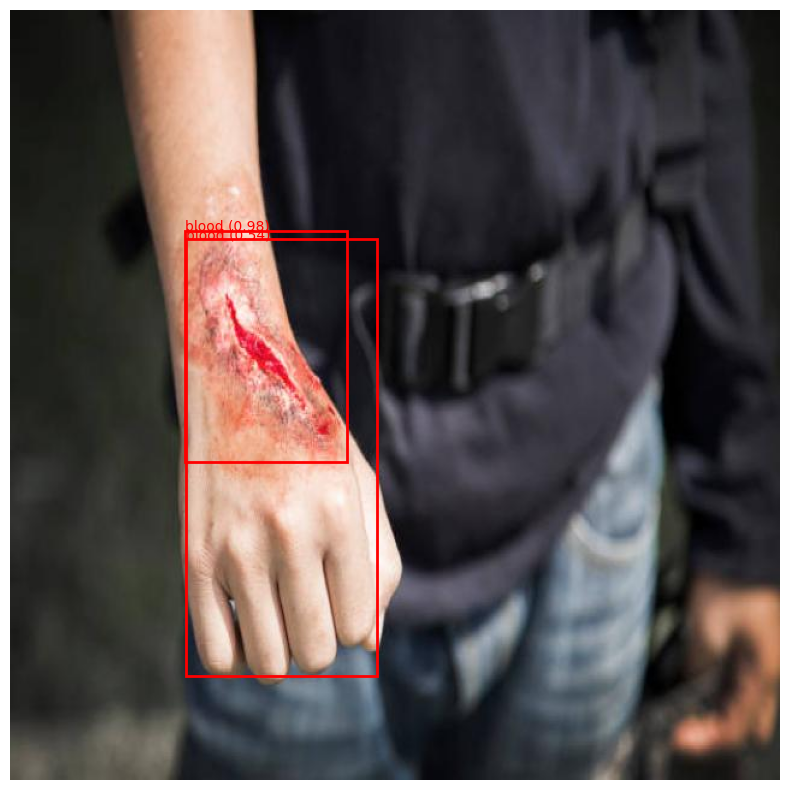

In [12]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
from PIL import Image

# Load Faster R-CNN with ResNet-50 backbone
def get_model(num_classes):
    # Load pre-trained Faster R-CNN
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # Replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

# Initialize the model
# classes: breast, anus, female_genital, male_genital, objects, harmful_object, safe, self_harm, sexual_content, toxic_substance, violence
num_classes = 11

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')# Load the trained model
model = get_model(num_classes)
model.load_state_dict(torch.load("fasterrcnn_resnet50_epoch_5.pth"))
model.to(device)
model.eval()  # Set the model to evaluation mode


def prepare_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Open image
    image_tensor = F.to_tensor(image).unsqueeze(0)  # Convert image to tensor and add batch dimension
    return image_tensor.to(device)

# Load the unseen image
image_path = "/kaggle/working/hod/valid/img_hod_000034_jpg.rf.298c360a67bed245389a3b1e6fef0a51.jpg"
image_tensor = prepare_image(image_path)

with torch.no_grad():  # Disable gradient computation for inference
    prediction = model(image_tensor)

# `prediction` contains:
# - boxes: predicted bounding boxes
# - labels: predicted class labels
# - scores: predicted scores for each box (confidence level)
COCO_CLASSES = { 1: "breast",
    2: "anus",
    3: "female_genital",
    4: "male_genital",
    5: "alcohol",
    6: "blood",
    7: "cigarette",
    8: "gun",
    9: "insulting_gesture",
    10: "knife" }

def get_class_name(class_id):
    return COCO_CLASSES.get(class_id, "Unknown")

# Draw bounding boxes with the correct class names and increase image size
def draw_boxes(image, prediction, fig_size=(10, 10)):
    boxes = prediction[0]['boxes'].cpu().numpy()  # Get predicted bounding boxes
    labels = prediction[0]['labels'].cpu().numpy()  # Get predicted labels
    scores = prediction[0]['scores'].cpu().numpy()  # Get predicted scores

    # Set a threshold for showing boxes (e.g., score > 0.5)
    threshold = 0.5

    # Set up the figure size to control the image size
    plt.figure(figsize=fig_size)  # Adjust the figure size here

    for box, label, score in zip(boxes, labels, scores):
        if score > threshold:
            x_min, y_min, x_max, y_max = box
            class_name = get_class_name(label)  # Get the class name
            plt.imshow(image)  # Display the image
            plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                              linewidth=2, edgecolor='r', facecolor='none'))
            plt.text(x_min, y_min, f"{class_name} ({score:.2f})", color='r')

    plt.axis('off')  # Turn off axis
    plt.show()

# Display the image with bounding boxes and correct labels
draw_boxes(Image.open(image_path), prediction, fig_size=(12, 10))  # Example of increased size